### Notation
In order to forecast using estimates from the delay distribution we develop the following notation. 


Suppose we have a time series $Y_1,Y_2,...,Y_n$ indexed by a sequence of time values $t_1,t_2,...,t_n$. We adopt the forecasting notation of Reich et. al (2018) in order to evaluate targets across models. 

Suppose we are interested in forecasting a target $z(*|t_j)$ at time $t_j$. In general, since data are delayed in being reported, we are interested in forecasting relative to a timepoint in the past relative to $t_j$. For our purposes, we fix a lag $L$ as the number of timepoints we go backwards into the past from a given $t_j$ at which our forecasts "originate".


For example, if $t_j$ is "now" then $t_j - L$ is the last $t^*$ for which all possible delay values $t^*,t^*+1, ....,+ t^*+L$ are completely observed. 

We define the following prediction $z(t_j - L +k | t_j)$ to be the *k-step* ahead prediction relative to time $t_j$. For our initial experiments, we define $z(t_j - L +k | t_j) = \hat{Y_{t_j - L + k}}$, so that we can define the MSE of model $M$ to be 

$$MSE_{t_j}(M) = \frac{1}{L}\sum_{k=0}^L [z(t_j - L +k | t_j) - Y_{j-L+k}]^2$$

In order to compute an average MSE over the full model $M$ we compute 

$$MSE(M) = \frac{1}{|T|}\sum_{t_j \in T}MSE_{t_j}(M)$$


For this experiment we examine 2 models 

$$M_1 = \text{ process model ignorning delay }$$

$$M_2 = \text{ process model weighted by delay distribution }$$


### Models

In this section we explore the difference between the two models, $M_1$ and $M_2$ more closely.

Suppose we have a "black box" routine that takes a time series from $Y_1,..,Y_i$ and produces forecasts for arbitrary $t_j$ for $j > i$.


Consider the naive model $M_1$ that ignores the delayed nature of the data. Here we take $Y_1,...,Y_{j-L}$ to be the set of data points with completely observed delay values, in the notation of Hole et al (2013), the complete reporting rectangle. The "naive" model that ignores the traingle, and thus the delay distribution, uses  $Y_1,...,Y_{j-L}$ to make forecasts for $t_j-L + k$ with $k > 0$. 


If we denote $F^{M_1}_{t_j}$ as the set of forecasts produced by model $M_1$ at time $t_j$. 

$$F^{M_1}_{t_j} = \{ z(t_j - L | t_j) , z(t_j - L + 1 | t_j ), z(t_j - L + 2| t_j ) ... ,z(t_j - L + K| t_j ) \}$$

We can adopt this to the situation where we incorporate partially observed data $t_j^*$, as follows:

$$F^{M_2}_{t_j} = \{ z(t_j - L | t_j,(t_j - L)^* ) , z(t_j - L + 1 | t_j,(t_j - L + 1)^* ), z(t_j - L + 2| t_j, (t_j - L + 3)^* ) ... ,z(t_j - L + K| t_j, (t_j - L + K)^* ) \}$$


The full set of forecasts varies over a set $t_j$

$$F^{M_1} = \cup_{j \in J} F^{M_1}_{t_j}$$


The question naturally becomes how to evaluate $z(t_j - L | t_j,(t_j - L)^* )$, that is how do we incorporate the partially observed data $(t_j - L)^*$.

We choose to write the likelihood of $Y_{t_j - L +k}^*$ as


$$ Y_{t_j - L +k}^* \sim Binom(Y_{t_j - L +k},\sum_{d=0}^{*} p_d)$$

We simply set 

$$z(t_j - L | t_j,(t_j - L)^* )  = \sum_{i} w_i *z(t_j - L | t_j)^{(mc)}$$

where $i$ indexes over a set of Monte Carlo samples of the target z(t_j - L | t_j) and $w_i$ is a normalized weight from the likelihood.





### Example

To make things more concrete we consider an example applied to Dengue incidence in Thailand province number 10. 

Let's first load the dataset.



In [47]:
data = []
with open ("province-biweek_with_delays.csv") as f:
        for line in f.readlines():
                data.append(line.replace("\n","").split(','))

province_10 = []

for dat in data:
        if dat[2] == "10":
                province_10.append(dat)

print (province_10)

[['2014', '1', '10', '85', '2014', '4'], ['2014', '1', '10', '8', '2014', '12'], ['2014', '1', '10', '1', '2014', '3'], ['2014', '1', '10', '79', '2014', '2'], ['2014', '2', '10', '1', '2014', '5'], ['2014', '2', '10', '186', '2014', '4'], ['2014', '2', '10', '5', '2014', '2'], ['2014', '2', '10', '5', '2014', '12'], ['2014', '2', '10', '6', '2014', '6'], ['2014', '3', '10', '3', '2014', '7'], ['2014', '3', '10', '1', '2015', '9'], ['2014', '3', '10', '9', '2014', '12'], ['2014', '3', '10', '75', '2014', '6'], ['2014', '3', '10', '1', '2014', '18'], ['2014', '3', '10', '102', '2014', '4'], ['2014', '4', '10', '121', '2014', '6'], ['2014', '4', '10', '2', '2014', '17'], ['2014', '4', '10', '17', '2014', '7'], ['2014', '4', '10', '1', '2014', '18'], ['2014', '4', '10', '4', '2014', '12'], ['2014', '5', '10', '1', '2014', '17'], ['2014', '5', '10', '3', '2014', '12'], ['2014', '5', '10', '1', '2015', '9'], ['2014', '5', '10', '1', '2014', '10'], ['2014', '5', '10', '23', '2014', '6'], ['2

Lets first take a look at all the dates where incidence occured.

In [61]:
import numpy as np
province_10 = np.array(province_10)
dates = np.unique(province_10[:,0:2],axis=0)
print (dates)

[['2014' '1']
 ['2014' '10']
 ['2014' '11']
 ['2014' '12']
 ['2014' '13']
 ['2014' '14']
 ['2014' '15']
 ['2014' '16']
 ['2014' '17']
 ['2014' '18']
 ['2014' '19']
 ['2014' '2']
 ['2014' '20']
 ['2014' '21']
 ['2014' '22']
 ['2014' '23']
 ['2014' '24']
 ['2014' '25']
 ['2014' '26']
 ['2014' '3']
 ['2014' '4']
 ['2014' '5']
 ['2014' '6']
 ['2014' '7']
 ['2014' '8']
 ['2014' '9']
 ['2015' '1']
 ['2015' '10']
 ['2015' '11']
 ['2015' '12']
 ['2015' '13']
 ['2015' '14']
 ['2015' '15']
 ['2015' '16']
 ['2015' '17']
 ['2015' '18']
 ['2015' '19']
 ['2015' '2']
 ['2015' '20']
 ['2015' '21']
 ['2015' '22']
 ['2015' '23']
 ['2015' '24']
 ['2015' '25']
 ['2015' '26']
 ['2015' '3']
 ['2015' '4']
 ['2015' '5']
 ['2015' '6']
 ['2015' '7']
 ['2015' '8']
 ['2015' '9']
 ['2016' '1']
 ['2016' '10']
 ['2016' '11']
 ['2016' '12']
 ['2016' '13']
 ['2016' '14']
 ['2016' '15']
 ['2016' '16']
 ['2016' '17']
 ['2016' '18']
 ['2016' '19']
 ['2016' '2']
 ['2016' '20']
 ['2016' '21']
 ['2016' '22']
 ['2016' '23']


Note these are sorted in lexographic order because they are strings. We have exactly 

In [58]:
print len(np.unique(province_10[:,0:2],axis=0))

78


Unique dates in the dataset. We can now map this to our notation. We have a time series 

$$Y_1,Y_2,.....,Y_{78}$$

For each $Y_i$ we consider a delay value $D$. To keep this simple to start with, let's fix $D=10$.

We can now construct a matrix of size $t_j, D$ or $78 x 10$ in order to fill in our reporting polygon.

In [60]:
reporting_polygon = np.zeros((78,10))

In order to correctly map dates into indeces we create the following dictionary by taking our dates object, converting it to an integer array, and sorting it.

In [74]:
date_index_dictionary = dict()
dates_as_num = []

def date_str_to_int(date):
        ## add a leading 0 in order for numeric sort to work
    date_int = 0
    if len(date[1]) == 1:
        date_int = int(date[0] + "0" +date[1])
    else:
        date_int = int(date[0] + date[1])
        
    return date_int

for date in dates:
    
    
    dates_as_num.append(date_str_to_int(date))
    
dates_as_num.sort()
i = 0
for date in dates_as_num:
    date_index_dictionary[date] = i
    i+=1
print (date_index_dictionary)

print (len(dates_as_num))


{201601: 52, 201602: 53, 201603: 54, 201604: 55, 201605: 56, 201606: 57, 201607: 58, 201608: 59, 201609: 60, 201610: 61, 201611: 62, 201612: 63, 201613: 64, 201614: 65, 201615: 66, 201616: 67, 201617: 68, 201618: 69, 201619: 70, 201620: 71, 201621: 72, 201622: 73, 201623: 74, 201624: 75, 201625: 76, 201626: 77, 201501: 26, 201502: 27, 201503: 28, 201504: 29, 201505: 30, 201506: 31, 201507: 32, 201508: 33, 201509: 34, 201510: 35, 201511: 36, 201512: 37, 201513: 38, 201514: 39, 201515: 40, 201516: 41, 201517: 42, 201518: 43, 201519: 44, 201520: 45, 201521: 46, 201522: 47, 201523: 48, 201524: 49, 201525: 50, 201526: 51, 201401: 0, 201402: 1, 201403: 2, 201404: 3, 201405: 4, 201406: 5, 201407: 6, 201408: 7, 201409: 8, 201410: 9, 201411: 10, 201412: 11, 201413: 12, 201414: 13, 201415: 14, 201416: 15, 201417: 16, 201418: 17, 201419: 18, 201420: 19, 201421: 20, 201422: 21, 201423: 22, 201424: 23, 201425: 24, 201426: 25}
78


We now have a list of sorted date numbers from 2014-01 to 2016-26. This will allow us to construct a complete reporting rectange of size 78*10

In [96]:
D = 10
for row in province_10:
    sick_date = date_str_to_int(row[:2])
    reported_date = date_str_to_int(row[4:])
    if reported_date <= 201626 and reported_date - sick_date < D:
        sick_date_index = date_index_dictionary[sick_date]
        reported_date_index = date_index_dictionary[reported_date]

        incidence = int(row[3])
        province = int(row[2])
        if province == 10 :
            reporting_polygon[sick_date_index][reported_date_index-sick_date_index] += incidence
    

print (reporting_polygon)


[[0.000e+00 2.370e+02 3.000e+00 4.250e+02 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.500e+01 0.000e+00 5.580e+02 3.000e+00 1.200e+01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.040e+02 0.000e+00 1.500e+02 6.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.800e+01]
 [0.000e+00 0.000e+00 2.420e+02 3.400e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 8.000e+00 0.000e+00]
 [0.000e+00 4.600e+01 1.340e+02 6.000e+00 2.000e+00 2.000e+00 0.000e+00
  6.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 6.600e+01 1.660e+02 2.400e+01 4.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.800e+01 1.040e+02 3.000e+01 4.000e+00 4.000e+00 0.000e+00
  0.000e+00 0.000e+00 7.000e+01]
 [0.000e+00 3.000e+01 7.800e+01 6.400e+01 1.600e+01 2.000e+00 0.000e+00
  0.000e+00 7.000e+01 0.000e+00]
 [0.000e+00 2.000e+00 8.000e+01 1.800e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.000e+00]
 [0.000e+00 3.400e+01 1.380e+02 2.400e+01 6.000e+00 0.0

We now have our complete reporting polygon which can artifically create a trapezoid shape from. For instance if we choose a $t_j$ and $L$ we can create arbitrary reporting shapes as follows.

In [113]:
t_j = 50
L = 10

train_reporting_polygon = reporting_polygon[:t_j-L].tolist()

offset = 0
for i in range(t_j - L,t_j):
    train_reporting_polygon.append(reporting_polygon[i][:D-offset].tolist())
    offset+=1
    
train_reporting_polygon = np.array(train_reporting_polygon).tolist()
#print (train_reporting_polygon.shape)
print (train_reporting_polygon)

[[0.0, 237.0, 3.0, 425.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [15.0, 0.0, 558.0, 3.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 204.0, 0.0, 150.0, 6.0, 0.0, 0.0, 0.0, 0.0, 18.0], [0.0, 0.0, 242.0, 34.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0], [0.0, 46.0, 134.0, 6.0, 2.0, 2.0, 0.0, 6.0, 0.0, 0.0], [0.0, 66.0, 166.0, 24.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 28.0, 104.0, 30.0, 4.0, 4.0, 0.0, 0.0, 0.0, 70.0], [0.0, 30.0, 78.0, 64.0, 16.0, 2.0, 0.0, 0.0, 70.0, 0.0], [0.0, 2.0, 80.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0], [0.0, 34.0, 138.0, 24.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 28.0, 102.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 60.0, 102.0, 0.0, 0.0, 44.0, 0.0, 0.0, 0.0, 0.0], [0.0, 54.0, 0.0, 0.0, 292.0, 2.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 372.0, 8.0, 0.0, 2.0, 0.0, 0.0, 0.0], [0.0, 0.0, 280.0, 120.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0], [0.0, 66.0, 252.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 86.0, 0.0, 298.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 296.0, 160.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

We see that we now have a descending trapezoid shape, we are ready to run some code! We set a range of $t_j$ values to plugin to our code in order to evaluate $M_1$ and $M_2$

100%|██████████| 50500/50500 [00:16<00:00, 3106.88it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


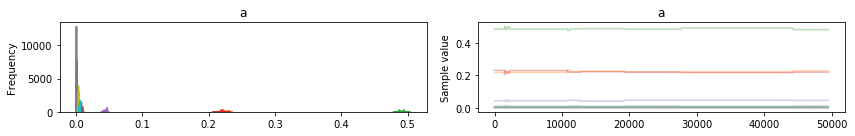

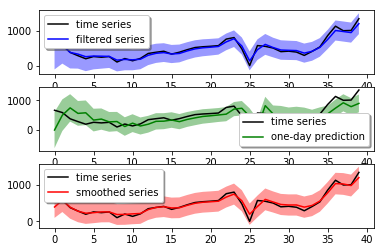

(array([1216.69287453, 1137.30732318, 1027.7296542 , 1018.96534825,
       1039.75413907, 1010.88873344, 1032.68668041, 1079.83336528,
       1130.08109615]), array([1720., 2370., 2728., 2428., 2892., 3108., 5120., 8232., 3716.]))
MSE ignoring delay
9891603.545670498
MSE delay adjusted
9866448.834388157
MSE taking most likely trajectory
8703062.941266885


100%|██████████| 50500/50500 [00:17<00:00, 2954.70it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


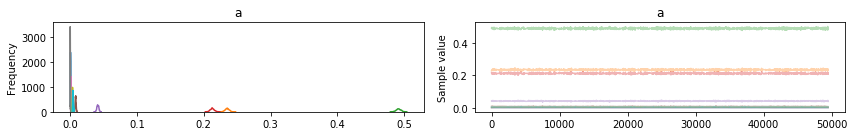

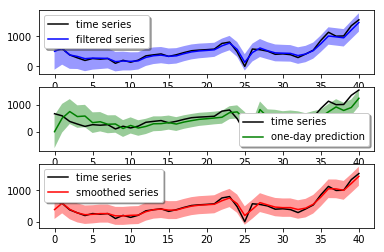

(array([1440.99765313, 1316.86403565, 1253.08186854, 1261.00681782,
       1238.08922277, 1246.12209373, 1261.16977931, 1245.36169164,
       1299.45059846]), array([2370., 2728., 2428., 2892., 3108., 5120., 8232., 3716.,    0.]))
MSE ignoring delay
9087057.47422628
MSE delay adjusted
9037180.237557704
MSE taking most likely trajectory
9662347.993826235

 94%|█████████▍| 47557/50500 [00:15<00:00, 3072.14it/s]

In [ ]:

 
total_mse_m1 = 0
total_mse_m2 = 0
total_mse_m3 = 0

T = range(50,60)

for tau in T:
    
    t_j = tau
    L = D = 10

    train_reporting_polygon = reporting_polygon[:t_j-L].tolist()
    
    offset = 0
    for i in range(t_j - L,t_j):
        train_reporting_polygon.append(reporting_polygon[i][:D-offset].tolist())
        offset+=1

    train_reporting_polygon = np.array(train_reporting_polygon).tolist()
    #print (train_reporting_polygon.shape)

    


    train_n_t_d = train_reporting_polygon[:t_j-L]
    train_n_t_inf = np.array(train_reporting_polygon[:t_j-L]).sum(axis=1)
    
    #print (test_n_t_inf.shape)
    test_n_t_d = train_reporting_polygon[t_j-L:]
    test_n_t_inf = np.sum(reporting_polygon[t_j-L + 1:t_j],axis=1)

    import numpy as np
    import pymc3 as pm
    import pandas as pd


    ## Delay Model

    DELAY_DIST = True
    if DELAY_DIST == True:

        k = np.array(train_n_t_d).shape[1 ]

        with pm.Model() as multinom_test:
            a = pm.Dirichlet('a', a=np.ones(k))
            for i in range(len(train_n_t_d)):
                data_pred = pm.Multinomial('data_pred_%s'% i, n=sum(train_n_t_d[i]), p=a, observed=train_n_t_d[i])
            trace = pm.sample(50000, pm.Metropolis())
            #trace = pm.sample(1000) # also works with NUTS

        pm.traceplot(trace[500:]);

    state_trajectories = []
    PF = False
    if  PF:
        N = 10000
        state_space_dimension = 1

        params = []
        means , particles, weights = run_pf(train_n_t_inf,N,state_space_dimension,D,params)



        ### Interval Predictions
        state_trajectories = [particles]
        observation_trajectories = [np.exp(particles)]
        for i in range(len(test_n_t_inf)):
            tmp = expected_value_transition_function(state_trajectories[i-1])
            observation_trajectories.append(expected_value_observation_function(tmp))
            state_trajectories.append(tmp) 

        state_trajectories = state_trajectories[1:]
        ## MEAN
        #print (np.mean(observation_trajectories,axis=1))
        ## QUANTILES 
        state_trajectories = np.array(state_trajectories).reshape((len(test_n_t_inf),-1))


    else:
        myDLM = dlm(train_n_t_inf)
        myDLM = myDLM + trend(1, name='lineTrend', w=1.0)
        # add a 7 day seasonality with prior covariance 1.0
        myDLM = myDLM + seasonality(52, name='7day', w=1.0)
        # add a 3 step auto regression
        myDLM = myDLM + autoReg(degree=2, data=train_n_t_inf, name='ar3', w=1.0)
        myDLM.fit()
        (predictMean, predictVar) = myDLM.predictN(N=D-1, date=myDLM.n-1)




    for i in range(len(predictMean)):
        samples = np.random.normal(predictMean[i],np.sqrt(predictVar[i]),100)
        state_trajectories.append(samples)
    state_trajectories = np.array(state_trajectories)


    phat = trace['a'].mean(axis=0)
    from scipy.stats import binom



    myDLM.plot()

    ##compute weighted trajectories 

    weighted_trajectories = []
    for i in range(len(state_trajectories)):
        tmp = []
        samples = state_trajectories[i]
        row_sum = sum(test_n_t_d[i])
        q = sum(phat[:len(phat)-i-1])
        for samp in samples:
            btemp = binom.pmf(row_sum,samp,q)
            if np.isnan(btemp):
                tmp.append(0)
            else:
                tmp.append(btemp)
            #print (row_sum,samp,q,btemp)
        weighted_trajectories.append(tmp)
    weighted_trajectories = np.array(weighted_trajectories)

    
    for i in range(len(weighted_trajectories)):
        weighted_trajectories[i] = weighted_trajectories[i]/sum(weighted_trajectories[i])
    where_are_NaNs = np.isnan(weighted_trajectories)
    weighted_trajectories[where_are_NaNs] = 1e-50
    #print (weighted_trajectories)
    ###
    from sklearn.metrics import mean_squared_error



    max_indeces = np.argmax(weighted_trajectories,axis=1)
    max_point = []
    for i in range(len(max_indeces)):
        max_point.append(state_trajectories[i][max_indeces[i]])

    print (np.average(state_trajectories,axis=1),test_n_t_inf)
    print "MSE ignoring delay"
    print (mean_squared_error(np.average(state_trajectories,axis=1),test_n_t_inf))
    total_mse_m1 += mean_squared_error(np.average(state_trajectories,axis=1),test_n_t_inf)
    print "MSE delay adjusted"
    print (mean_squared_error(np.average(state_trajectories,weights = weighted_trajectories,axis=1),test_n_t_inf))
    total_mse_m2 += mean_squared_error(np.average(state_trajectories,weights = weighted_trajectories,axis=1),test_n_t_inf)
    print "MSE taking most likely trajectory"
    print (mean_squared_error(max_point,test_n_t_inf))
    total_mse_m3 += mean_squared_error(max_point,test_n_t_inf)

print "--------------\n\n\n"
print "MSE ignoring delay"
print (total_mse_m1/len(T))
print "MSE delay adjusted"
print (total_mse_m2/len(T))
print "MSE most likely trajectory"
print (total_mse_m3/len(T))

MSE ignoring delay
5766287.012548659
MSE delay adjusted
5708279.331005294